In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv(r'C:\Users\abhis\OneDrive\Desktop\DATA SCIENCE\ExcelR\Assignments\Problem statements - ExcelR\Recommendation System\Excel\anime.csv')
df.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12294 non-null  int64  
 1   name      12294 non-null  object 
 2   genre     12232 non-null  object 
 3   type      12269 non-null  object 
 4   episodes  12294 non-null  object 
 5   rating    12064 non-null  float64
 6   members   12294 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 672.5+ KB


In [4]:
df.isnull().sum()       # Checking if there any Null values.

anime_id      0
name          0
genre        62
type         25
episodes      0
rating      230
members       0
dtype: int64

In [5]:
for i in df:                       # Filling Null Value
    df[i].isnull().sum()
    df[i] = df[i].fillna('')

In [6]:
df.isnull().sum() # As we can see there are no Null Values

anime_id    0
name        0
genre       0
type        0
episodes    0
rating      0
members     0
dtype: int64

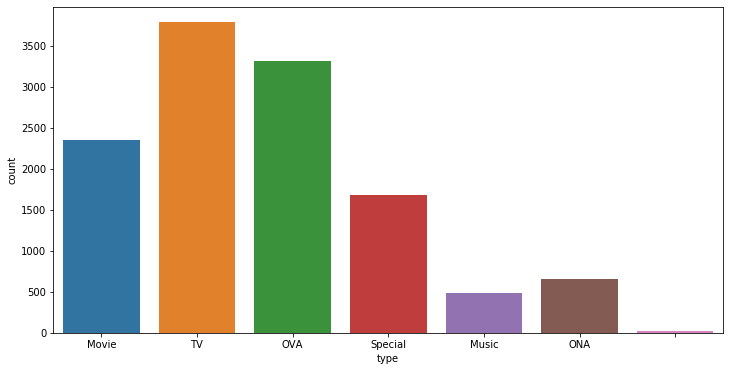

In [7]:
# We will now do EDA on this Dataset.

plt.figure(figsize=(12,6))
sns.countplot(x='type',data=df)

In [8]:
df.nunique()

anime_id    12294
name        12292
genre        3265
type            7
episodes      187
rating        599
members      6706
dtype: int64

In [9]:
df.groupby('name')['rating'].count().sort_values(ascending=False).head()

name
Shi Wan Ge Leng Xiaohua    2
Saru Kani Gassen           2
◯                          1
Himawari!                  1
Himekishi Angelica         1
Name: rating, dtype: int64

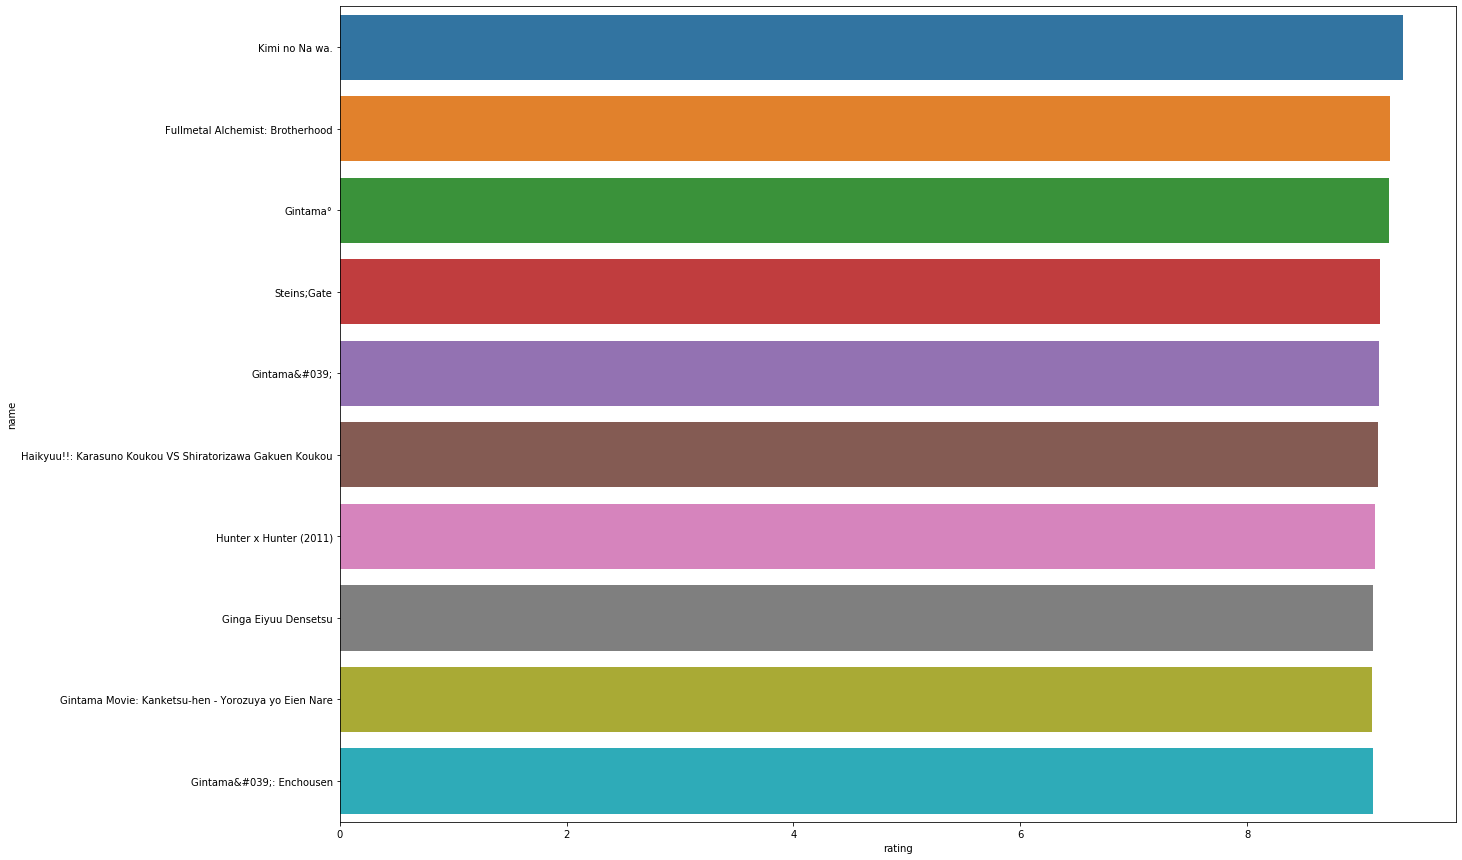

In [10]:
plt.figure(figsize=(20,15))
sns.barplot(y = df['name'][0:10],x=(df['rating'])[0:10],capsize =5)

In [11]:
df['genre'].unique()

array(['Drama, Romance, School, Supernatural',
       'Action, Adventure, Drama, Fantasy, Magic, Military, Shounen',
       'Action, Comedy, Historical, Parody, Samurai, Sci-Fi, Shounen',
       ..., 'Hentai, Sports', 'Drama, Romance, School, Yuri',
       'Hentai, Slice of Life'], dtype=object)

In [12]:
df['name'].nunique()

12292

In [13]:
#df.groupby('genre')['rating'].mean()

In [14]:
# Recommending similar books
#Anime_pivot = pd.pivot_table(index='anime_id',columns='name',values=df.groupby(),data=df)

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [16]:
Tfidf = TfidfVectorizer(stop_words='english')

In [17]:
Tfidf_Anime = Tfidf.fit_transform(df['name'])
Tfidf_Anime.shape

(12294, 11993)

In [18]:
from sklearn.metrics.pairwise import linear_kernel

In [19]:
cosine_similarity = linear_kernel(Tfidf_Anime,Tfidf_Anime)
print(cosine_similarity)

[[1.        0.        0.        ... 0.        0.        0.       ]
 [0.        1.        0.        ... 0.        0.        0.       ]
 [0.        0.        1.        ... 0.        0.        0.       ]
 ...
 [0.        0.        0.        ... 1.        0.8141553 0.       ]
 [0.        0.        0.        ... 0.8141553 1.        0.       ]
 [0.        0.        0.        ... 0.        0.        1.       ]]


In [20]:
cosine_similarity[1]

array([0., 1., 0., ..., 0., 0., 0.])

In [21]:
anime_index = pd.Series(df.index,index=df['name']).drop_duplicates()
anime_index.head()

name
Kimi no Na wa.                      0
Fullmetal Alchemist: Brotherhood    1
Gintama°                            2
Steins;Gate                         3
Gintama&#039;                       4
dtype: int64

In [22]:
#an = anime_index['Gintama°']
#an

In [23]:
#cosine_scores = list(enumerate(cosine_similarity[an]))

In [24]:
#cosine_scores = sorted(cosine_scores,key= lambda x:x[1],reverse=True)
#cosine_scores

In [25]:
#cosine_scores_10 = cosine_scores[0:10]
#cosine_scores_10

In [26]:
#Index = [i[0] for i in cosine_scores_10]
#Scores =  [i[1] for i in cosine_scores_10]

In [27]:
#Similar_Anime = pd.DataFrame(columns=['Name','Rating'])

In [28]:
#Similar_Anime['Name'] = df.loc[Index,'name']
#Similar_Anime['Name']

In [29]:
#Similar_Anime['Rating'] = Scores
#Similar_Anime['Rating']

In [30]:
def get_recommendation(Name,TopN):
    
    #Getting the anime index from there title. topN Value
    anime_id = anime_index[Name]
    
    #Getting the pairwise similaity score of all the Anime's
    cosine_scores = list(enumerate(cosine_similarity[anime_id]))
    
    # Sorting the Cosine Similarity scores based on scores
    cosine_scores = sorted(cosine_scores,key= lambda x:x[1],reverse=True)
    
    # Get the scores of top 10 most similar Anime's
    cosine_scores_T10 = cosine_scores[0:TopN+1]
    
    # Get the Anime Index
    Index = [i[0] for i in cosine_scores_T10]
    Scores = [i[1] for i in cosine_scores_T10]
    
    # Similar movies and scores
    Similar_content = pd.DataFrame(columns=['Name','Rating'])
    Similar_content['Name'] = df.loc[Index,'name']
    Similar_content['Rating'] = Scores
    Similar_content.reset_index(inplace=True)
    Similar_content.drop(['index'],axis=1,inplace=True)
    print(Similar_content)   

In [31]:
get_recommendation('Kimi no Na wa.',TopN=10)

                         Name    Rating
0              Kimi no Na wa.  1.000000
1           Kimi wa Tomodachi  0.620519
2        Kimi no Na wo Yobeba  0.542092
3             Kimi to Boku. 2  0.483800
4               Kimi to Boku.  0.483800
5                Kimi to Boku  0.483800
6   Boku wa Kimi wo Warawanai  0.464336
7          Kimi wa Sou Kimeta  0.440721
8     Shigatsu wa Kimi no Uso  0.436638
9            Karakuri no Kimi  0.413026
10      Kaze no Na wa Amnesia  0.411673


In [32]:
get_recommendation('One Punch Man',TopN=10)

                           Name    Rating
0                 One Punch Man  1.000000
1               One Punch Man 2  1.000000
2        One Punch Man Specials  0.914376
3   One Punch Man: Road to Hero  0.725746
4                    Punch Line  0.496228
5                  Hustle Punch  0.474991
6                   Sweat Punch  0.463104
7                Pinch to Punch  0.463104
8                      Iron Man  0.445185
9                      Mega Man  0.427620
10                      Eat-Man  0.421190
